---
# Imports

In [1]:
# imports.py
from imports import *
from sklearn.datasets import make_blobs

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h
import wrangle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# Tidiness

In [2]:
df=wrangle.wrangle_df()
df.info()
# model_h.print_btcusd(df)
df.head()

cached csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2014-10-20 to 2022-05-24
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2770 non-null   float64
 1   high                          2770 non-null   float64
 2   low                           2770 non-null   float64
 3   close                         2770 non-null   float64
 4   volume                        2770 non-null   float64
 5   fwd_log_ret                   2770 non-null   float64
 6   fwd_ret                       2770 non-null   float64
 7   fwd_pct_chg                   2770 non-null   float64
 8   fwd_close_positive            2770 non-null   float64
 9   cross                         2770 non-null   float64
 10  histy                         2770 non-null   float64
 11  month_9                       2770 non-null   float64
 12  month_10                      277

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cross,histy,month_9,month_10,day_20,day_1,day_9,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners,sentiment,obv_close_product
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000.0,0.009437,3.630005,0.009482,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,False,False,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233,0.234784,0.458883
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900.0,-0.008620,-3.317016,-0.008583,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590,0.274812,0.510393
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300.0,-0.066750,-24.740998,-0.064571,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.258505,0.465414
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900.0,-0.000201,-0.071991,-0.000201,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590,0.277373,0.286309
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700.0,-0.031391,-11.074005,-0.030903,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933,0.276173,0.302494


<AxesSubplot:>

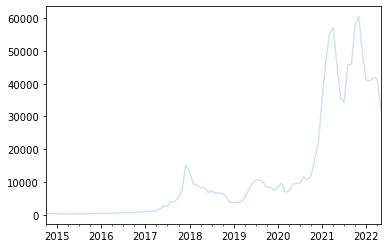

In [3]:
df.close.resample('m').mean().plot(alpha=.2, label='resample')

In [4]:
train_i, validate=tidy.split_i(df)
train_i.info(),train_i.head()
# train_ii, test=tidy.split_ii(df)
# train_ii.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2707 non-null   float64
 1   high                          2707 non-null   float64
 2   low                           2707 non-null   float64
 3   close                         2707 non-null   float64
 4   volume                        2707 non-null   float64
 5   fwd_log_ret                   2707 non-null   float64
 6   fwd_ret                       2707 non-null   float64
 7   fwd_pct_chg                   2707 non-null   float64
 8   fwd_close_positive            2707 non-null   float64
 9   cross                         2707 non-null   float64
 10  histy                         2707 non-null   float64
 11  month_9                       2707 non-null   float64
 12  month_10                      2707 non-null 

(None,
                   open        high         low       close      volume  \
 2014-10-20  389.230988  390.084015  378.252014  382.845001  16419000.0   
 2014-10-21  382.420990  392.645996  380.834015  386.475006  14188900.0   
 2014-10-22  386.118011  388.575989  382.248993  383.157990  11641300.0   
 2014-10-23  382.962006  385.048004  356.446991  358.416992  26456900.0   
 2014-10-24  358.591003  364.345001  353.304993  358.345001  15585700.0   
 
             fwd_log_ret    fwd_ret  fwd_pct_chg  fwd_close_positive  cross  \
 2014-10-20     0.009437   3.630005     0.009482                 1.0    0.0   
 2014-10-21    -0.008620  -3.317016    -0.008583                 0.0    0.0   
 2014-10-22    -0.066750 -24.740998    -0.064571                 0.0    0.0   
 2014-10-23    -0.000201  -0.071991    -0.000201                 0.0    0.0   
 2014-10-24    -0.031391 -11.074005    -0.030903                 0.0    0.0   
 
             histy  month_9  month_10  day_20  day_1  day_9  \
 2

---
# Baseline

In [5]:
train_i.close[-1]-train_i.close[0]

# this is simple return if you bought 1 btc in 2014-09-17 and sold in 2022-03-23

41975.963593

In [6]:
train_i.close.sum()-train_i.open.sum()

# this is simple return if you bought every morning and sold every night

37403.99116999656

---
# MACD 

In [7]:
def macd_df(df):
	'''
	macd encoder
	'''
	macd, signal, histo = talib.MACD(df.close,fastperiod=12, slowperiod=26, signalperiod=9)
	mac=pd.concat([df,macd,signal,histo],axis=1)
	mac=mac.rename(columns={0:'macd',1:'signal',2:'histo'})
	mac=mac.drop(mac[mac.index<'2014-10-20'].index)
	mac=mac.fillna(0)
	cools=mac.histo>0
	start=cools[0]
	not_list=[]

	for x in cools:
		if x:
			not_list.append(1)
		else:
			not_list.append(0)

	not_list=pd.Series(not_list, index=mac.index)
	bools=mac.macd>mac.signal
	yesterday=bools[0]
	list=[]

	for today in bools:
		if today==yesterday:
			list.append(0)
			continue
		else:
			list.append(1)
			yesterday=today

	list=pd.Series(list, index=mac.index)

	# crossover indicator
	macker=pd.concat([mac.close,list,not_list],axis=1)
	macker=macker.rename({0:'cross',1:'histy'},axis=1)

	return macker, mac

macker, mac=macd_df(train_i)

In [8]:
mac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2707 non-null   float64
 1   high                          2707 non-null   float64
 2   low                           2707 non-null   float64
 3   close                         2707 non-null   float64
 4   volume                        2707 non-null   float64
 5   fwd_log_ret                   2707 non-null   float64
 6   fwd_ret                       2707 non-null   float64
 7   fwd_pct_chg                   2707 non-null   float64
 8   fwd_close_positive            2707 non-null   float64
 9   cross                         2707 non-null   float64
 10  histy                         2707 non-null   float64
 11  month_9                       2707 non-null   float64
 12  month_10                      2707 non-null 

In [9]:
def macd_roi(df):
	buy=[]
	sell=[]
	for i in df.index:
		if df.loc[i].cross > 0:
			if df.loc[i].histy > 0:
				buy.append(df.loc[i].close)
				sell.append(0)
			else:
				buy.append(0)
				sell.append(df.loc[i].close)
		else:
			continue
	return buy,sell
	
buy,sell=macd_roi(macker)

In [10]:
profits=pd.DataFrame({'buy':buy,'sell':sell})

In [11]:
profits.head()

,buy,sell
0,379.244995,0.000000
1,0.000000,369.604004
2,320.192993,0.000000
3,0.000000,281.082001
4,233.406006,0.000000


In [12]:
if profits.buy.loc[0] == 0:
	profits=profits.drop(0)
	profits.sell=profits.sell.shift(-1)
else:
	profits.sell=profits.sell.shift(-1)

In [13]:
(profits.sell-profits.buy).sum()

34706.56967499999

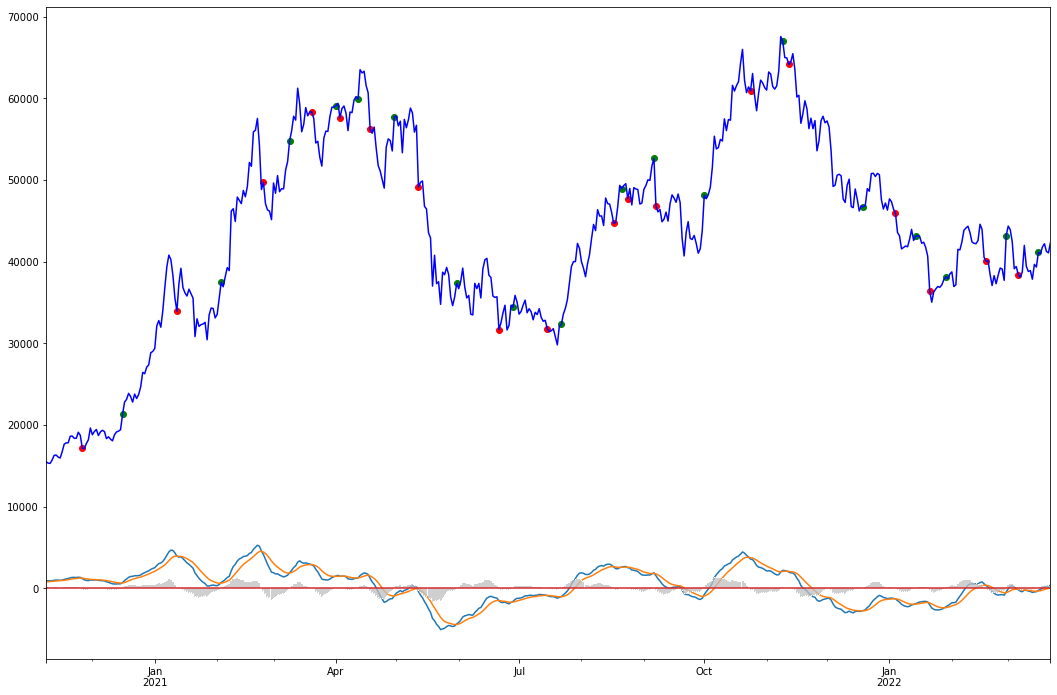

In [14]:
plt.figure(figsize=[18,12])
mac.macd.tail(500).plot()
mac.signal.tail(500).plot()
plt.stem(mac.index[-500:],mac['histo'].tail(500),linefmt='silver',markerfmt='w,')
_=macker[(macker.cross==1)&(macker.histy==1)].tail(500)
plt.scatter(y=_.close,x=_.index,c='green')
_=macker[(macker.cross==1)&(macker.histy==0)].tail(500)
plt.scatter(y=_.close,x=_.index,c='red')
macker.close.tail(500).plot(color='blue')
plt.show()


#wip


---
# Xy Split

In [15]:
mac.columns

Index(['open', 'high', 'low', 'close', 'volume', 'fwd_log_ret', 'fwd_ret',
       'fwd_pct_chg', 'fwd_close_positive', 'cross', 'histy', 'month_9',
       'month_10', 'day_20', 'day_1', 'day_9', 'atr_above_threshold_0.01',
       'atr_above_threshold_0.05', 'atr_above_threshold_0.1',
       'atr_above_threshold_0.2', 'atr_above_threshold_0.3',
       'avg-fees-per-transaction', 'cost-per-transaction-percent',
       'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue',
       'transaction-fees-to-miners', 'sentiment', 'obv_close_product', 'macd',
       'signal', 'histo'],
      dtype='object')

In [ ]:
X=mac[['open', 'high', 'low', 'close', 'volume', 'macd', 'signal', 'histo', 'cross', 'histy', 'atr_above_threshold_0.01',
       'atr_above_threshold_0.05', 'atr_above_threshold_0.1',
       'atr_above_threshold_0.2', 'atr_above_threshold_0.3','sentiment', 'obv_close_product']]

In [ ]:
y=df[['fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']]

In [ ]:
X_train, X_val=tidy.split_i(X)

In [ ]:
y_train, y_val=tidy.split_i(y)

In [ ]:
smaller=X_train.volume.copy()

X_train.volume=smaller.astype('float64')

In [ ]:
for col in X_train.columns:
	if X_train[col].dtype == 'float64':
		xs=np.array(X_train[[col]]).reshape(-1, 1)
		X_train.loc[:,col]=RobustScaler().fit_transform(xs)
		print(col)


In [ ]:
X_train.head()

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [ ]:

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [ ]:
y_train.head()

In [ ]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train.fwd_close_positive, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train.fwd_close_positive, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train.fwd_close_positive, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train.fwd_close_positive, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train.fwd_close_positive, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, labels))

In [ ]:
np.argwhere(np.isnan(labels))

In [ ]:
labels=pd.DataFrame(labels,columns=['clust'],dtype='int',index=X_train.index)

In [ ]:
labels.info()

In [ ]:
type(labels.clust.iloc[0])

In [ ]:
type(X_train.open.iloc[0])

In [ ]:
X_train.info()

In [ ]:
X_train=pd.concat([X_train,labels],axis=1)

In [ ]:
xt=X_train.loc['2018':'2021']

In [ ]:
sns.relplot(x=X_train.loc['2018':'2021'].index, y=X_train.loc['2018':'2021'].close, hue=X_train.loc['2018':'2021'].clust)

In [ ]:
X_train.head()

In [ ]:
X_train=X_train.drop('clust',axis=1)

In [ ]:
pf = PolynomialFeatures(degree=2)

In [ ]:
X_train_degree2 = pf.fit_transform(X_train)

In [ ]:
X_validate_degree2 = pf.transform(X_val)

In [ ]:
rfe = RFE(pf, n_features_to_select=None)